In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle, datetime
import hydracv.utils.utils as utils
import scipy.ndimage

from analyzer import Analyzer

In [3]:
# anlzr = Analyzer()
anlzr = pickle.load(open("./data/objects/2020-04-01-23-35.txt", "rb"))

In [5]:
anlzr.videos()

Control-EGCaMP_exp1_a1_30x10fps_5%.avi
EGCaMP_ctrl_30mins_40x_10fps_mv1.avi
Control-EGCaMP_exp1_a2_25x10fps_30mins.avi
EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi
EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi
Pre_Bisect_40x_4fps_ex4.avi


In [6]:
MIDLINE_PATH = "~/Documents/hydracv/hydracv/data/length/"
MIDLINE_PREFIX = "lengths_"

In [7]:
VIDEONAME = anlzr._video_names()

# Create midline length paths
FILEPATH = []
for video in VIDEONAME:
    path = MIDLINE_PATH + MIDLINE_PREFIX + video.split('.')[0] + '.csv'
    FILEPATH.append(path)

In [12]:
FILEPATH

['~/Documents/hydracv/hydracv/data/length/lengths_Control-EGCaMP_exp1_a1_30x10fps_5%.csv',
 '~/Documents/hydracv/hydracv/data/length/lengths_EGCaMP_ctrl_30mins_40x_10fps_mv1.csv',
 '~/Documents/hydracv/hydracv/data/length/lengths_Control-EGCaMP_exp1_a2_25x10fps_30mins.csv',
 '~/Documents/hydracv/hydracv/data/length/lengths_EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.csv',
 '~/Documents/hydracv/hydracv/data/length/lengths_EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.csv',
 '~/Documents/hydracv/hydracv/data/length/lengths_Pre_Bisect_40x_4fps_ex4.csv']

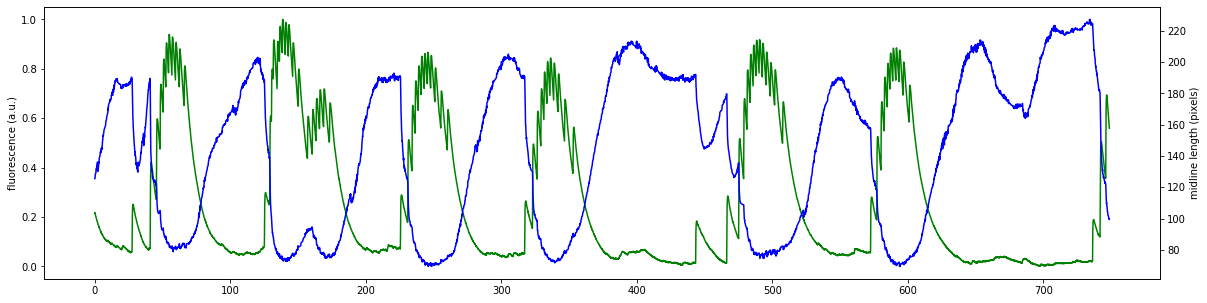

In [20]:
anlzr.add_midline_lens(VIDEONAME[0], FILEPATH[0])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[0])

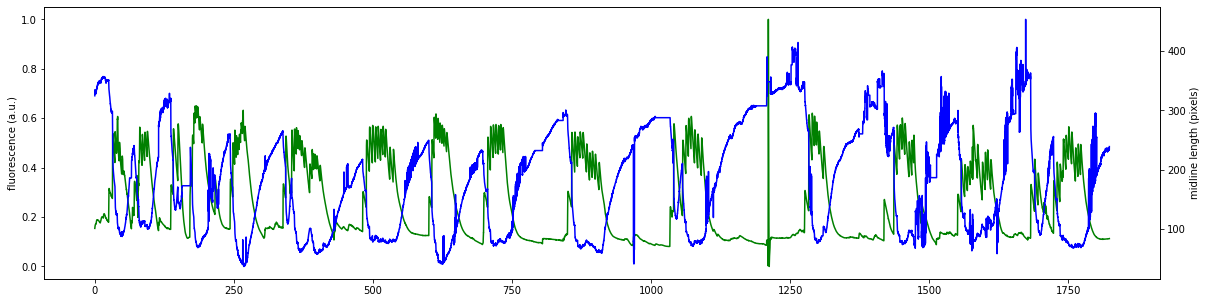

In [13]:
anlzr.add_midline_lens(VIDEONAME[1], FILEPATH[1])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[1])

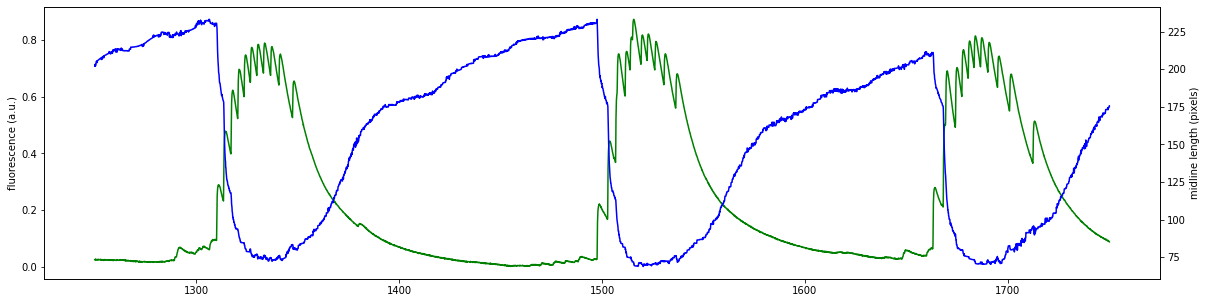

In [14]:
anlzr.add_midline_lens(VIDEONAME[2], FILEPATH[2])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[2], 12500, 17500)

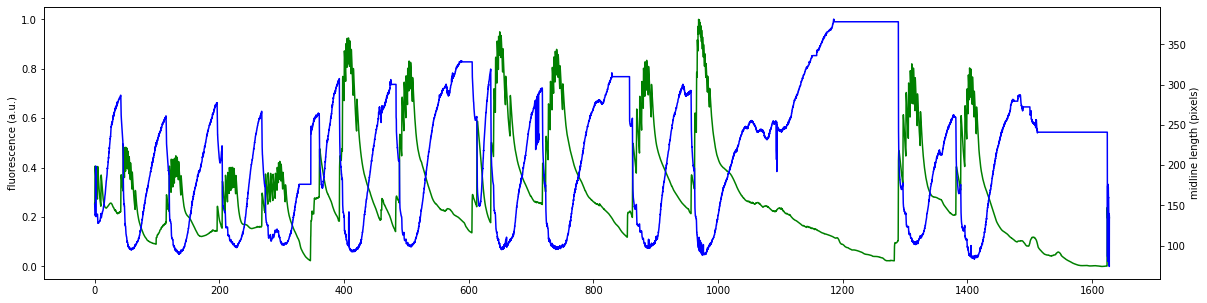

In [27]:
anlzr.add_midline_lens(VIDEONAME[4], FILEPATH[4])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[4])

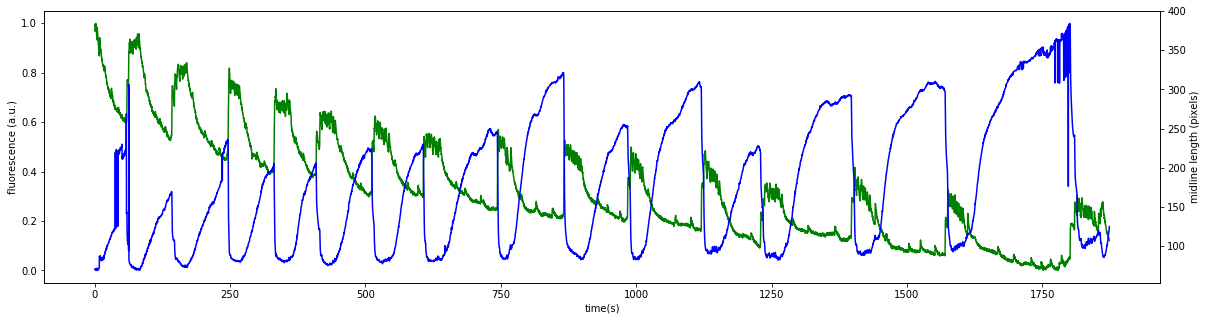

In [71]:
anlzr.add_midline_lens(VIDEONAME[5], FILEPATH[5])
anlzr.plot_fluos_and_midline_lens(VIDEONAME[5])

In [5]:
(3000-1100) / 4

475.0

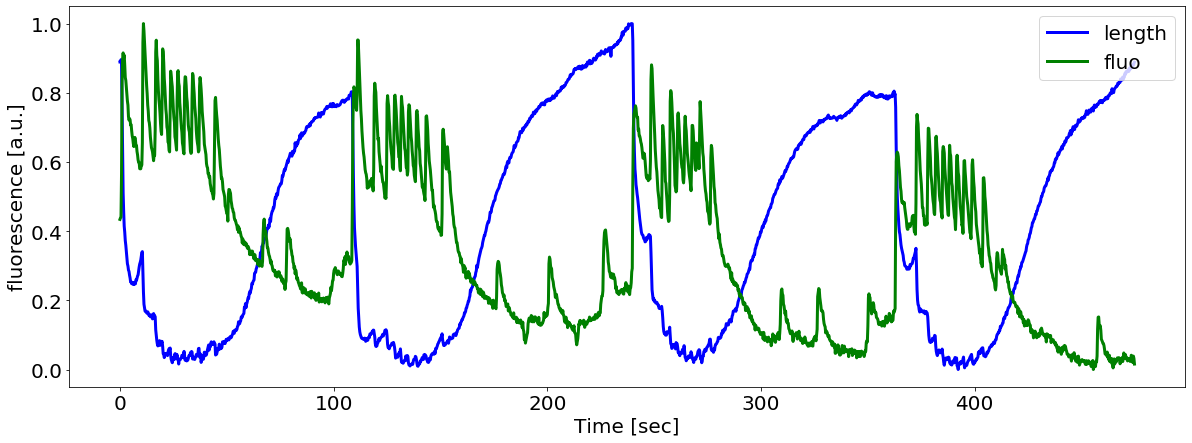

In [14]:
import copy

fluo = pd.read_csv('./data/fluorescence/total_fluo_Pre_Bisect_40x_4fps_ex3.csv').values
orig_lengths = pd.read_csv('./data/length/lengths_Pre_Bisect_40x_4fps_ex3.csv').values

lengths = utils.filter_abnormal(orig_lengths)
lengths = [x[0] for x in lengths]

timex = np.arange(0, 475, 0.25)
# timex = np.arange(0, 500*0.25, 0.25)

plt.figure(figsize=(20,7))
# plt.plot(utils.normalize(lengths[2500:3500]), 'b')
# plt.plot(utils.normalize(fluo[2500:3500]), 'g')
plt.plot(timex, utils.normalize(lengths[1100:3000]), 'b', linewidth=3, label='length')
plt.plot(timex, utils.normalize(fluo[1100:3000]), 'g', linewidth=3, label='fluo')
# plt.plot(timex, utils.normalize(lengths[1500:2000]), 'b', linewidth=3, label='length')
# plt.plot(timex, utils.normalize(fluo[1500:2000]), 'g', linewidth=3, label='fluo')
# plt.plot(utils.normalize(origin_lengths[500:2000]), 'r--')
plt.legend(fontsize=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Time [sec]', size=20)
plt.ylabel('fluorescence [a.u.]', size=20)
plt.show()

In [13]:
df = pd.DataFrame(lengths)
df.to_csv('./data/length/lengths_filtered_Pre_Bisect_40x_4fps_ex3.csv', index=False)

In [1]:
from find_midline import load_marker

In [2]:
markers = load_marker("data/marker/EGCaMP_ctrl_30mins_20x_10fps_mv1DLC_resnet50_EGCaMP_ctrl_30mins_20x_10fps_mv1May11shuffle1_216000.csv")

In [6]:
markers

,hypostome_x,hypostome_y,hypostome_likelihood,armpit1_x,armpit1_y,armpit1_likelihood,armpit2_x,armpit2_y,armpit2_likelihood,peduncle_x,peduncle_y,peduncle_likelihood
0,150.103790,253.980316,1.000000,154.814026,264.617371,0.999999,159.612854,251.209259,1.0,397.027283,146.789658,1.0
1,150.142059,253.987717,1.000000,154.791229,264.889008,0.999999,159.605682,251.235428,1.0,397.273468,146.798950,1.0
2,149.597565,254.088684,1.000000,154.686752,265.002441,1.000000,159.546951,251.444641,1.0,397.281769,146.852203,1.0
3,149.532730,254.033539,1.000000,154.457870,265.163544,0.999999,159.662277,251.551971,1.0,397.054535,146.811050,1.0
4,149.578232,253.804977,0.999999,153.887421,265.040833,0.999999,159.499680,251.828491,1.0,396.852478,146.848648,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18509,266.612305,54.780506,1.000000,252.294449,56.473068,1.000000,260.631805,70.417488,1.0,186.276428,240.968109,1.0
18510,267.000366,54.404411,1.000000,252.462585,55.976784,1.000000,260.868530,70.107849,1.0,186.274368,240.956314,1.0
18511,267.321442,54.169125,1.000000,252.851273,55.590355,1.000000,261.047119,69.761742,1.0,186.231812,240.951752,1.0
18512,269.206268,53.318272,1.000000,253.347763,55.203575,1.000000,261.487579,69.369743,1.0,186.224136,240.927673,1.0
